## Machine Learning Activity - Pump it up.


In [1]:
# We import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# We import training values and training labels.

df_values = pd.read_csv('training_set_values.csv')
labels = pd.read_csv('training_set_labels.csv')


### 1. EDA 

In [3]:
# We count the number of values in each file, check their information, and visualize them.

print('Size of the training set values table',df_values.shape[0])
print('Size of the training set labels table:',labels.shape[0])

Size of the training set values table 59400
Size of the training set labels table: 59400


In [4]:
pd.set_option('display.max_columns', None)
df_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [6]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB


In [8]:
labels['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

In [9]:
# After analyzing both CSV files, we see that they have the same number of rows (59,400), so they can be merged. We will create a new dataframe where the 'status_group' column 
# will be joined to the right of the table using the ID.

df = pd.merge(df_values, labels, on = "id", how = "left")

#We inspect whether the column was correctly added using head().

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
df.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1896
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37399
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               2695
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

### 2. Data Preprocessing

In [12]:
# We recategorize 'date_recorded' to datetime using pandas

df['date_recorded']= pd.to_datetime(df['date_recorded'],format='%Y-%m-%d')

In [13]:
# We analyze missing values.

df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

**FUNDER**: The missing values in the 'Funder' feature represent 6.12%. We find the mode of the feature and impute the missing values.

In [14]:
mode_funder=df['funder'].mode()[0]
mode_funder

'Government Of Tanzania'

In [15]:
df['funder']=df['funder'].fillna(mode_funder)
df['funder'].isnull().sum()

0

**INSTALLER**: The missing values in the 'Installer' feature represent 6.15%. We find the mode of the feature and impute the missing values

In [16]:
mode_installer=df['installer'].mode()[0]
mode_installer

'DWE'

In [17]:
df['installer']=df['installer'].fillna(mode_installer)
df['installer'].isnull().sum()

0

**SUBVILLAGE**: The missing values in the 'Subvillage' feature represent 0.63%. We analyze the possibility of imputing with the mode, but the result is '0 Madukani'. 

We perform a value_counts() and see that the mode is not representative. 

The best option is to drop the rows containing the missing values

In [18]:
mode_subvillage = df['subvillage'].mode()
mode_subvillage

0    Madukani
Name: subvillage, dtype: object

In [19]:
df['subvillage'].value_counts()

subvillage
Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: count, Length: 19287, dtype: int64

In [20]:
df.dropna(subset=['subvillage'], inplace=True)


In [21]:
df['subvillage'].isnull().sum()

0

**SCHEME MANAGEMENT** : The missing values in the 'Scheme_management' feature represent 6.52%. We find the mode of the feature and impute the missing values.

In [22]:
mode_scheme_management=df['scheme_management'].mode()[0]
mode_scheme_management

'VWC'

In [23]:
df['scheme_management']=df['scheme_management'].fillna(mode_scheme_management)
df['scheme_management'].isnull().sum()

0

**PUBLIC MEETING**: The missing values in the 'public_meeting' feature represent 5.61%. We find the mode of the feature and impute the missing values.

In [24]:
mode_public_meeting=df['public_meeting'].mode()[0]
mode_public_meeting

True

In [25]:
df['public_meeting']=df['public_meeting'].fillna(mode_public_meeting)
df['public_meeting'].isnull().sum()

0

**PERMIT**: The missing values in the 'Permit' feature represent 5.14%. We find the mode of the feature and impute the missing values

In [26]:
mode_permit =df['permit'].mode()[0]
mode_permit

True

In [27]:
df['permit']=df['permit'].fillna(mode_permit)
df['permit'].isnull().sum()

0

**SCHEME NAME**: The 'scheme_name' feature has 28,810 missing values, accounting for 48.50% of the sample. 

We cannot replace them with the mode as it could introduce bias. Therefore, we choose to drop the feature.

In [28]:
df.drop(columns=['scheme_name'], inplace=True)

**WPT_NAME**: The 'wpt_name' feature has two missing values. We drop the rows containing the missing values.

In [29]:
df['wpt_name'].isnull().sum()

2

In [30]:
df.dropna(subset=['wpt_name'], inplace=True)

In [31]:
# We check that there are no more missing values.
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [32]:
#We drop irrelevant columns.
df.drop(['id', 'recorded_by'], axis=1, inplace=True)

# We separate numerical and categorical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

### **Analysis of numerical features**

In [33]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 59027 entries, 0 to 59399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59027 non-null  float64
 1   gps_height         59027 non-null  int64  
 2   longitude          59027 non-null  float64
 3   latitude           59027 non-null  float64
 4   num_private        59027 non-null  int64  
 5   region_code        59027 non-null  int64  
 6   district_code      59027 non-null  int64  
 7   population         59027 non-null  int64  
 8   construction_year  59027 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.5 MB


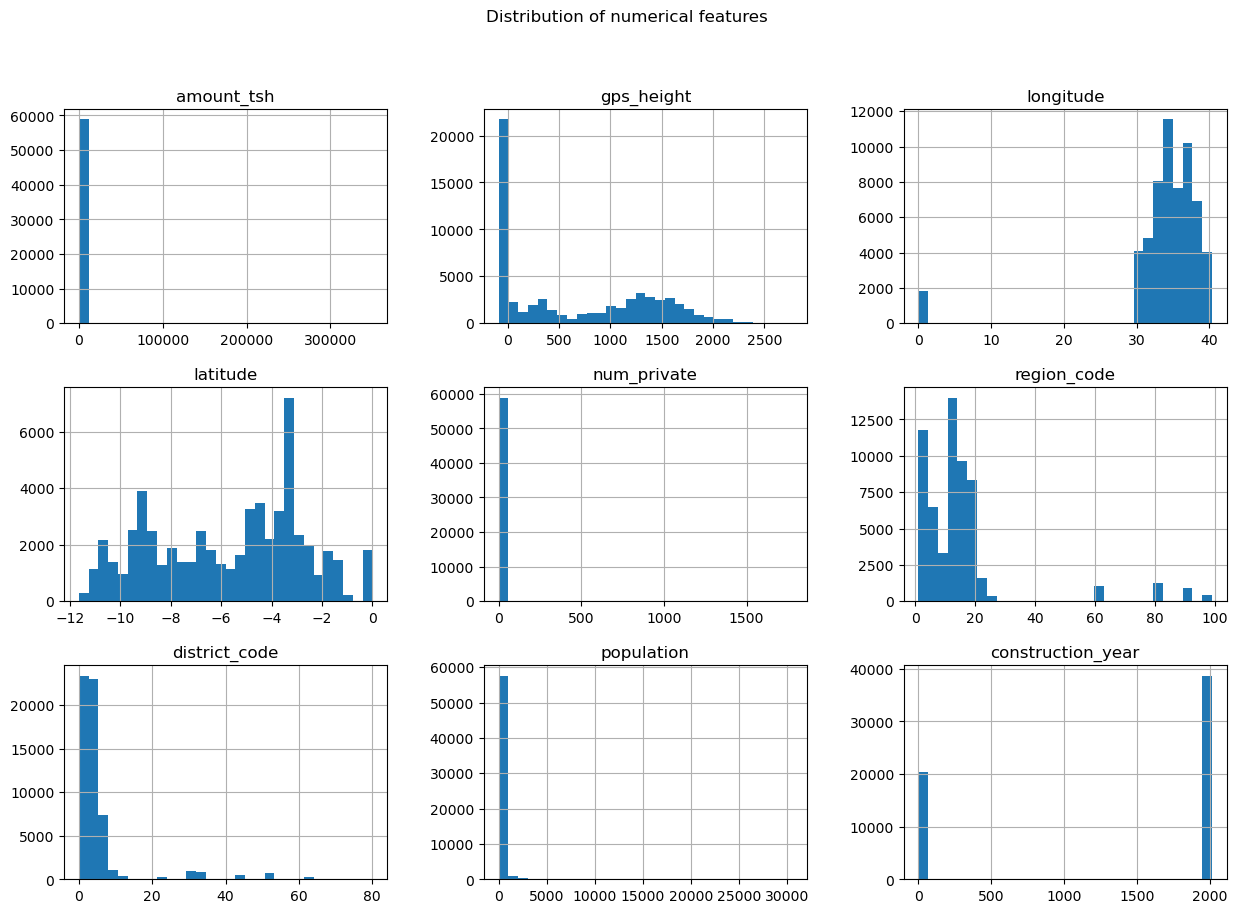

In [34]:
# Histogram

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of numerical features")
plt.show()

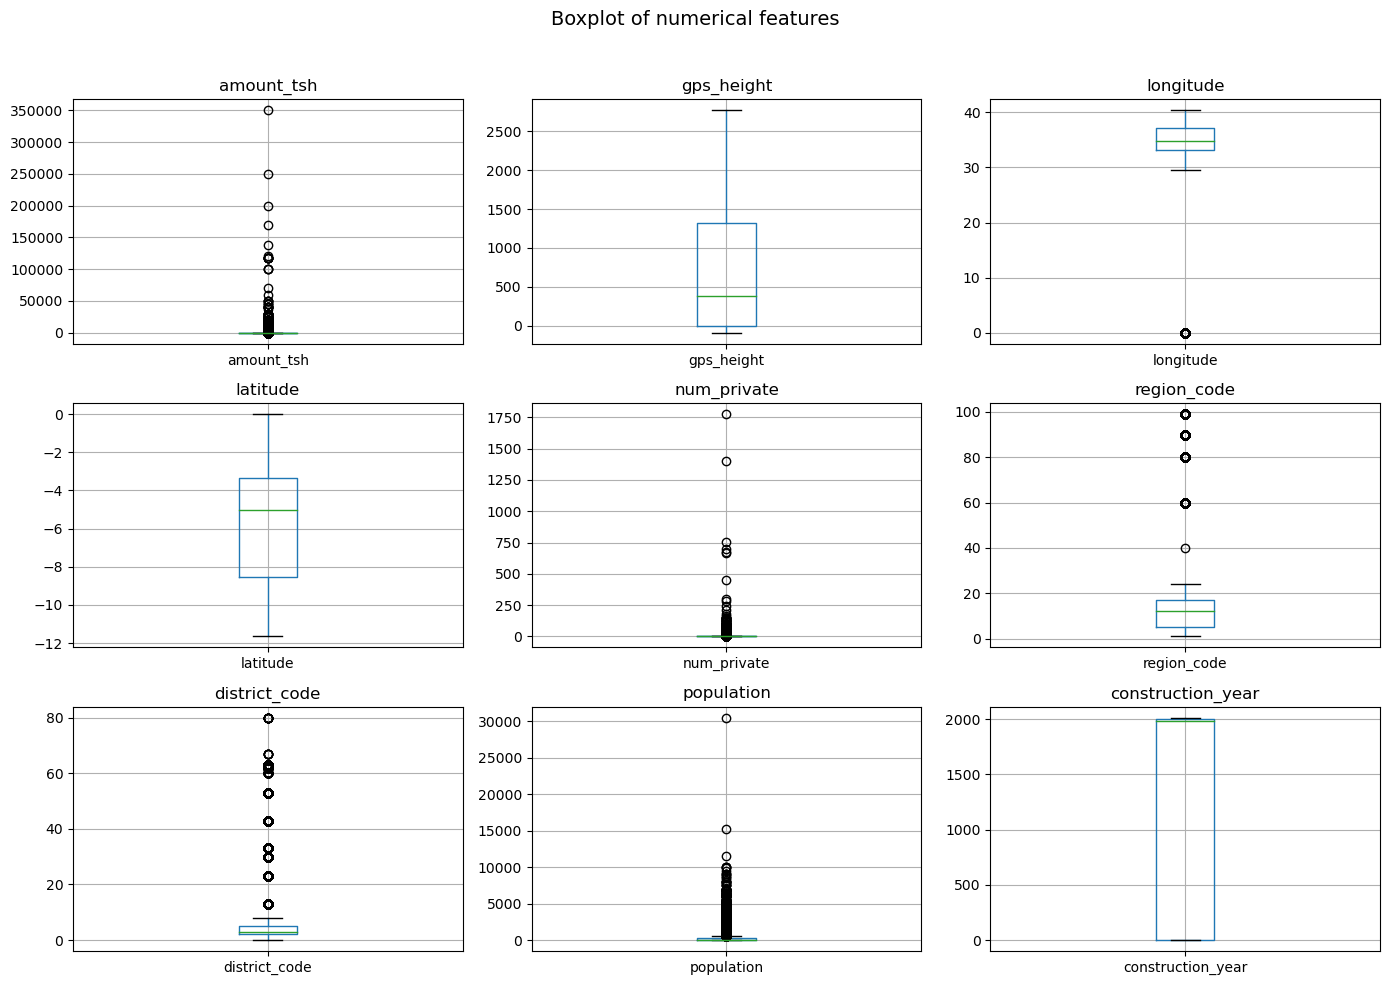

In [35]:
# Boxplot 

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    


plt.suptitle("Boxplot of numerical features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

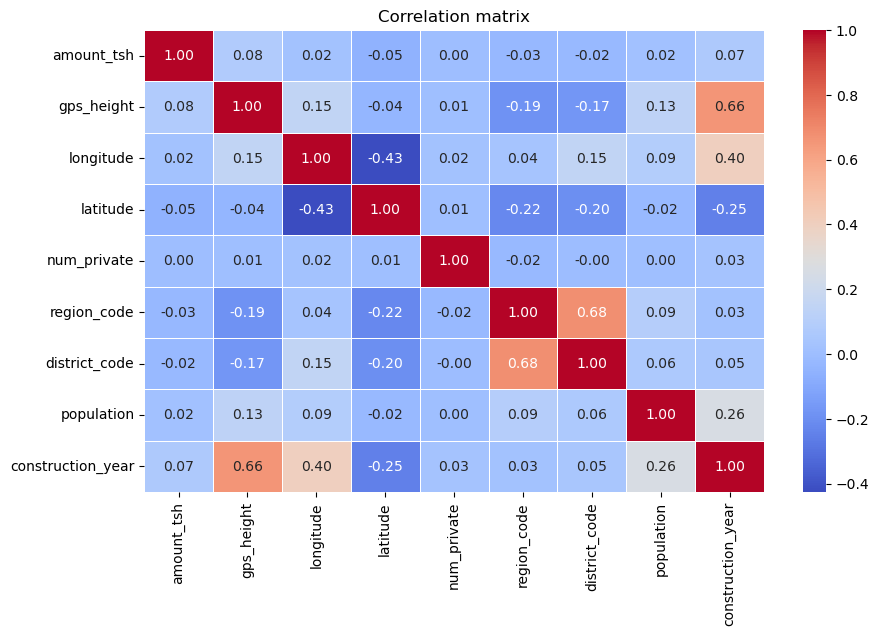

In [36]:
#Correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

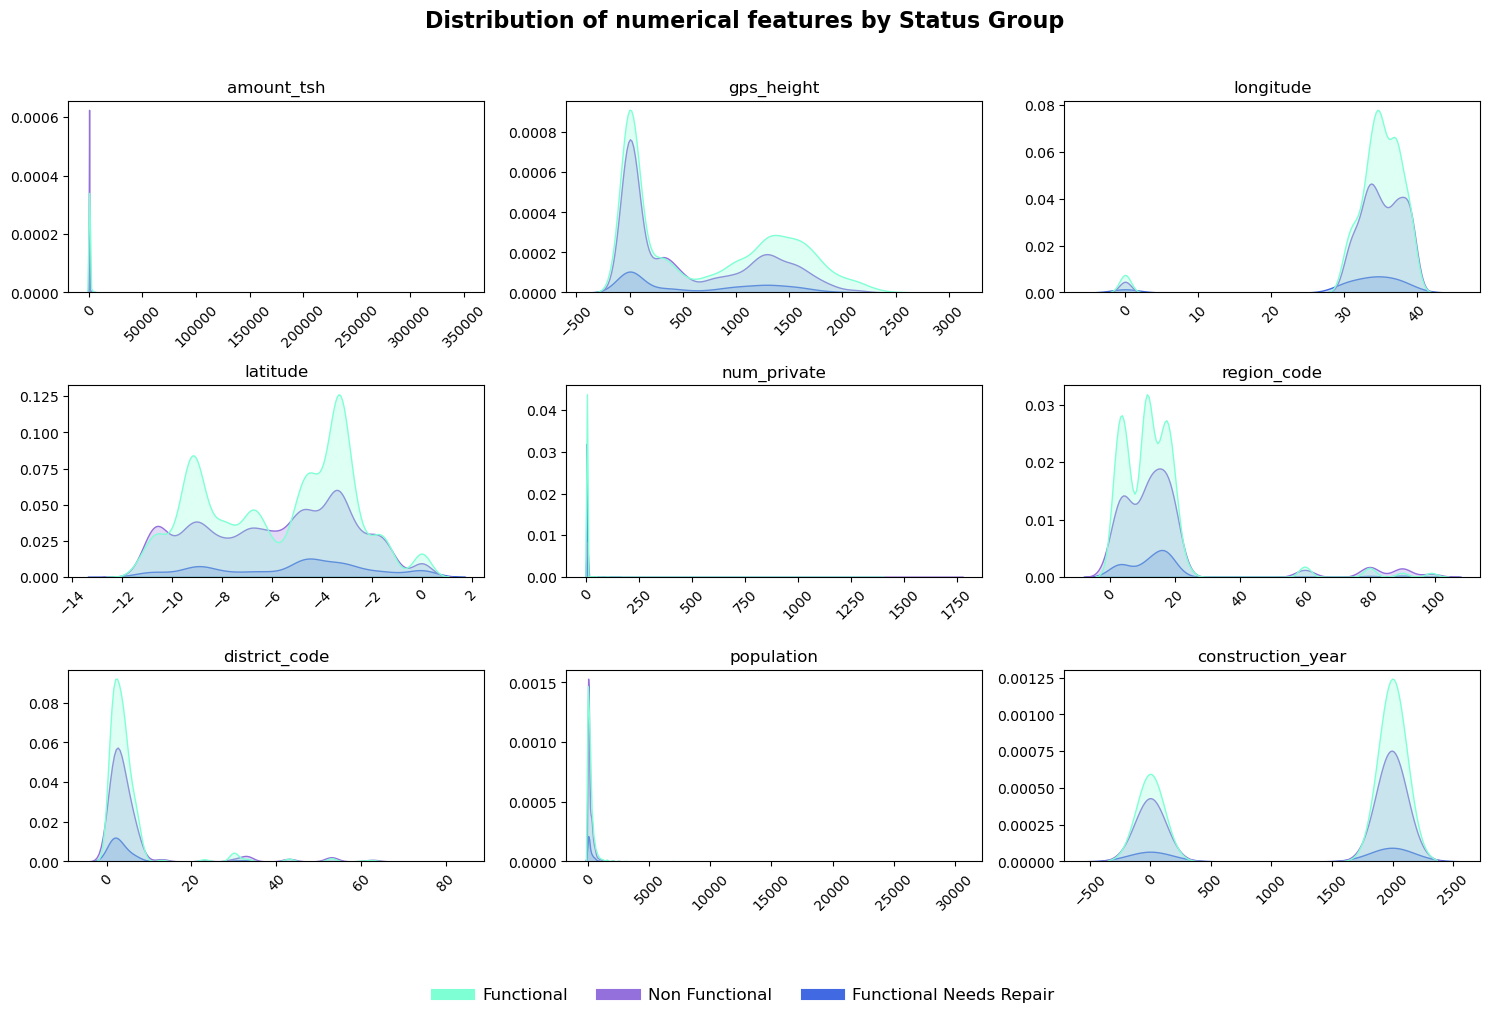

In [37]:
# Distribution of numerical features by Status Group

colors = {'functional': 'aquamarine', 'non functional': 'mediumpurple', 'functional needs repair': 'royalblue'}
num_columns = 3
num_rows = math.ceil(len(num_cols) / num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 3 * num_rows))
axes = axes.flatten()


for i, column in enumerate(num_cols):
    sns.kdeplot(data=df, x=column, hue='status_group', palette=colors, fill=True, ax=axes[i], 
                hue_order=['functional', 'non functional', 'functional needs repair'], legend=False)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45) 
    

handles = [plt.Line2D([0], [0], color=colors[label], lw=8) for label in ['functional', 'non functional', 'functional needs repair']]
fig.legend(handles, ['Functional', 'Non Functional', 'Functional Needs Repair'], 
           loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize='large', frameon=False)


plt.suptitle('Distribution of numerical features by Status Group', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **Analysis of categorical features**

In [38]:
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 59027 entries, 0 to 59399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   funder                 59027 non-null  object
 1   installer              59027 non-null  object
 2   wpt_name               59027 non-null  object
 3   basin                  59027 non-null  object
 4   subvillage             59027 non-null  object
 5   region                 59027 non-null  object
 6   lga                    59027 non-null  object
 7   ward                   59027 non-null  object
 8   scheme_management      59027 non-null  object
 9   extraction_type        59027 non-null  object
 10  extraction_type_group  59027 non-null  object
 11  extraction_type_class  59027 non-null  object
 12  management             59027 non-null  object
 13  management_group       59027 non-null  object
 14  payment                59027 non-null  object
 15  payment_type           5

In [39]:
df[cat_cols].nunique()

funder                    1893
installer                 2134
wpt_name                 37230
basin                        9
subvillage               19287
region                      21
lga                        124
ward                      2080
scheme_management           11
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

To plot the categorical features, we distinguish between those with fewer than 10 categories (**cat_10**) and those with more than 10 categories (**cat_more_10**). For the features with more than 10 categories, we will display the top 5 of each and group the remaining categories under 'others'.

In [40]:
cat_10 = [col for col in cat_cols if df[col].nunique() <= 10 ]

cat_more_10 = [col for col in cat_cols if df[col].nunique() > 10]

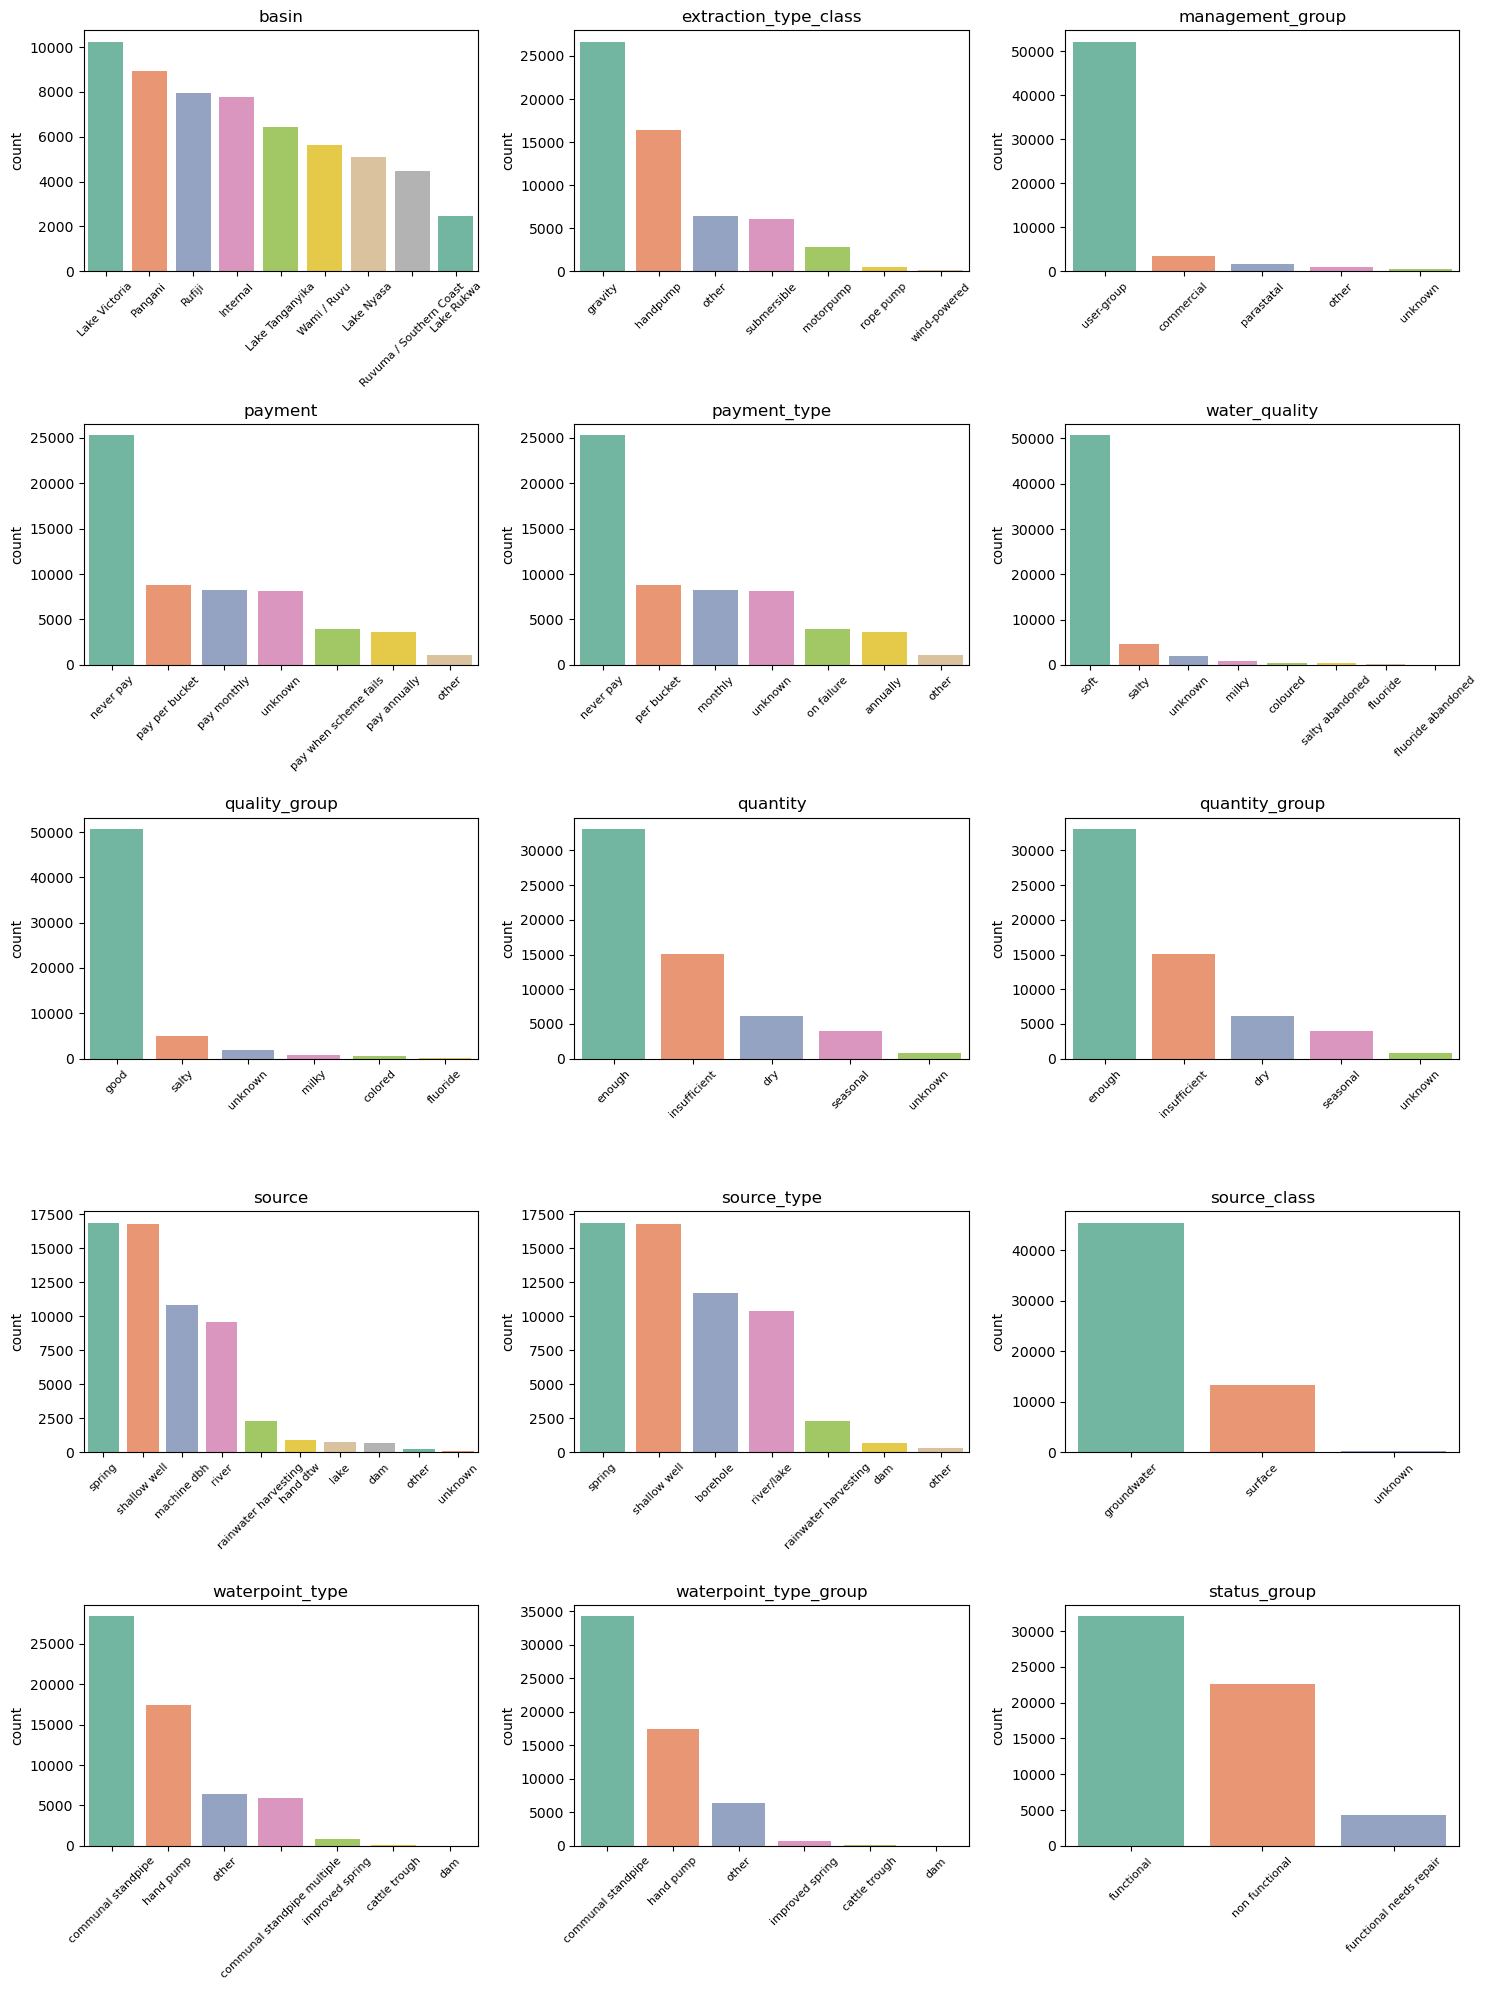

In [41]:
num_columns = 3
num_rows = math.ceil(len(cat_10) / num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_10):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2', order=df[col].value_counts().index)
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45, labelsize=8) 
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

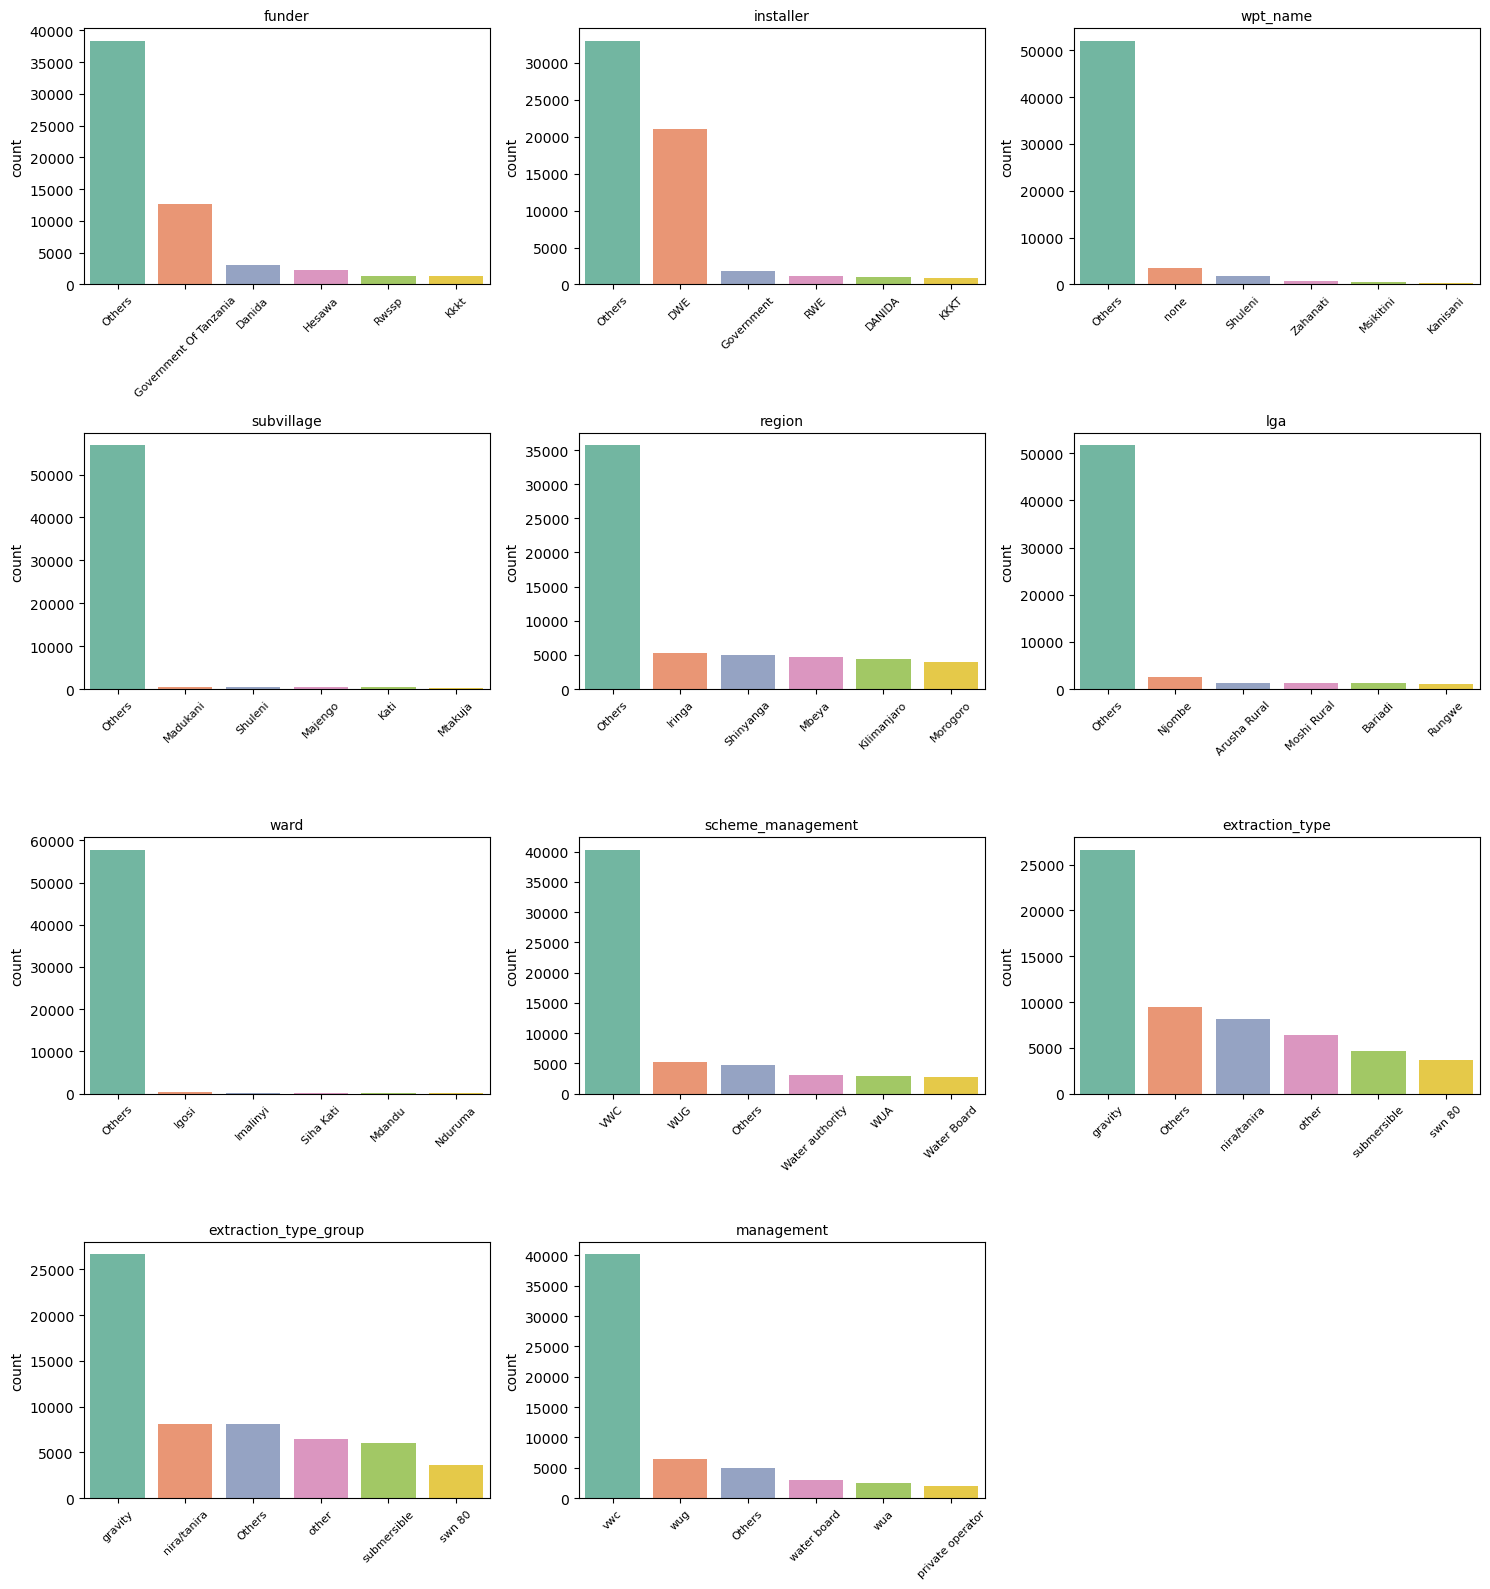

In [42]:
top_5_dict = {}

for col in cat_more_10:
    top_5 = df[col].value_counts().nlargest(5).index.tolist()  
    top_5_dict[col] = top_5  

num_columns = 3
num_rows = math.ceil(len(cat_more_10) / num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(cat_more_10):
    df_copy = df[col].apply(lambda x: x if x in top_5_dict[col] else 'Others')
    sns.countplot(x=df_copy, ax=axes[i], palette='Set2', order=df_copy.value_counts().index)
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)  
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Encode and Scale features. Split the data into train and test sets.

In [43]:
# Encode features

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df_encoded= pd.concat([df[num_cols], df[cat_cols]], axis=1)

In [44]:
# Train and Test

X = df_encoded.drop(columns=['status_group'])
y = df_encoded['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Random Forest Model

In [45]:
# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      6411
           1       0.56      0.31      0.40       863
           2       0.84      0.78      0.81      4532

    accuracy                           0.81     11806
   macro avg       0.73      0.66      0.69     11806
weighted avg       0.80      0.81      0.80     11806

Confusion Matrix:
[[5729  157  525]
 [ 446  271  146]
 [ 946   58 3528]]


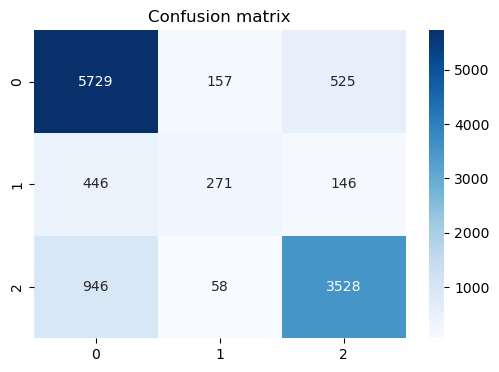

In [46]:
# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.show()

### Test Set Values

In [47]:
test_df = pd.read_csv('test_set_values.csv')
test_id = test_df['id']
test_df['date_recorded']= pd.to_datetime(test_df['date_recorded'],format='%Y-%m-%d')
test_df.drop(['id', 'recorded_by', 'scheme_name'], axis=1, inplace=True)
test_df.dropna(subset=['wpt_name', 'subvillage'], inplace=True)
test_df = test_df.apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col)


test_df.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
d

In [48]:
num_cols_test = test_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols_test = test_df.select_dtypes(include=['object']).columns

label_encoders = {}  
for col in cat_cols_test:
    le = LabelEncoder()
    test_df[col] = le.fit_transform(test_df[col].astype(str))  
    label_encoders[col] = le  



In [49]:
df_encoded_test= pd.concat([test_df[num_cols_test], test_df[cat_cols_test]], axis=1)
y_pred_test = rf_model.predict(df_encoded_test)
values = {0: 'functional', 1: 'functional needs repair', 2: 'non functional'}
y_pred_test_names = pd.Series(y_pred_test).map(values)

In [50]:
# We create the 'submission' document with the predictions.
test_id = test_id.iloc[:len(y_pred_test)] 

submission = pd.DataFrame({'id': test_id, 'status_group': y_pred_test_names})
submission.to_csv('submission.csv', index=False)

In [51]:
submission


,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional
...,...,...
14746,47648,functional
14747,69564,non functional
14748,34129,functional
14749,5055,functional
